In [1]:
# Uncomment this session to install packages 
# install.packages('ggplot2')
# install.packages('gapminder')
# install.packages('gganimate')
# install.packages('gifski')
# install.packages('av')
# install.packages('Rcpp')

In [1]:
library(ggplot2)
library(gganimate)
library(gridExtra)
library(plotly)


Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout




In [49]:
# Data generation
set.seed(1)
sigma=10
n=200; # 200 balls 
a=5; # 5 factor levels (colors)
#b=5;

#radius.mean=2*(2:(a+1)+ (6-b):5); 


mus=2*((c(4,1,3,5,2)+1));

#radius.mean=rep(3,r);  # What if we set the mean to be the same?
A<-rep(1:a,times=40)
#B<-rep(1:b,each=40)

#Y=2*(2*A+ 6-B)+rnorm(n,sd=1); # response Y
Y=(2*mus[A])+rnorm(n,sd=sigma); # response Y



In [50]:
Y

[1]  13.73546189   9.83643324   7.64371388  39.95280802  15.29507772
  [6]  11.79531616  12.87429052  23.38324705  29.75781352   8.94611613
 [11]  35.11781168  11.89843236   9.78759419   1.85300113  23.24930918
 [16]  19.55066391   7.83809737  25.43836211  32.21221195  17.93901321
 [21]  29.18977372  15.82136301  16.74564983   4.10648304  18.19825748
 [26]  19.43871260   6.44204493   1.29247616  19.21849945  16.17941560
 [31]  33.58679552   6.97212273  19.87671612  23.46194959  -1.77059557
 [36]  15.85005437   4.05710046  15.40686603  35.00025372  19.63175748
 [41]  18.35476404   5.46638320  22.96963375  29.56663199   5.11244305
 [46]  12.92504843  11.64581962  23.68532925  22.87653788  20.81107726
 [51]  23.98105880   1.87973607  19.41119691  12.70636904  26.33023702
 [56]  39.80399899   4.32778524   5.55865374  29.69719627  10.64945396
 [61]  44.01617761   7.60759997  22.89739362  24.28002159   4.56726791
 [66]  21.88792300 -10.04958629  30.65554862  25.53253338  33.72611670
 [71]  24.75509529   0.90053569  22.10726353  14.65902368  -0.53633400
 [76]  22.91446236   3.56708127  16.01105352  24.74341324   6.10479054
 [81]  14.31331267   6.64821385  27.78086997   8.76433200  17.93946188
 [86]  23.32950371  18.63099837  12.95816076  27.70018810  14.67098791
 [91]  14.57479969  20.07867806  27.60402616  31.00213650  27.86833455
 [96]  25.58486426  -4.76592208  10.26734586  11.75387385   7.26599364
[101]  13.79633323   8.42115873   6.89078351  25.58028772   5.45415356
[106]  37.67287269  15.16707476  25.10174229  27.84185358  28.82176081
[111]  13.64263546   3.38355270  30.32282239  17.49303647   9.92619256
[116]  16.07192071   4.80007131  13.20886697  28.94188331  10.22669518
[121]  14.94042538  21.43038825  13.85420591  22.20443470  10.99809259
[126]  27.12666307   7.26435596  15.62365829  17.18339521   8.75729728
[131]  20.60160440   2.11105514  21.31496193   8.81605918  15.06557861
[136]   4.63550176   4.99023873  10.71720096  17.47905219  11.43103222
[141]   0.85640574  19.76583312  -0.64972436  19.36469599   0.84079895
[146]  12.49180999  28.87166546  16.17395620  11.13699470  -4.40605534
[151]  24.50187101   7.81440167  12.81931625  14.70637853  -2.87460310
[156]   9.24807703  18.00028804   9.78733305  10.15573153  30.69290622
[161]  24.25100377   5.61352899  26.58483049  32.86422651   5.80756952
[166]  42.06102465   5.44972970   1.75505350  22.55600398  14.07538339
[171]  43.07978399   9.05802368  20.56998805  23.22847065   8.65999158
[176]  19.65273972  15.87639606  36.75245009  34.27392439  24.07908398
[181]   7.68676578  17.83895570  18.19924804   9.32749971  17.21022743
[186]  18.41245395  22.64587312   8.33918000  19.69788246   2.73890503
[191]  18.22896039  12.02011779   8.68251827  32.30373168  -0.08082786
[196]   9.52015587  22.41157707   5.84152535  28.11974712   8.18923949

In [51]:
# Parameters for visualizations
T = 10; # frame number for animation
xyrange=6;
# x and y coordinates

coords.A=matrix(0,nrow=n,ncol=T);
#coords.B=matrix(0,nrow=n,ncol=T)
coords.A[,1]= xyrange*runif(n);
#coords.B[,1]= xyrange*runif(n);

coords.A[,T]= A + 0.8*(runif(n)-0.5);
#coords.B[,T]= B + 0.8*(runif(n)-0.5);

for(i in 1:n){
    coords.A[i,]=seq(from=coords.A[i,1],to=coords.A[i,T],length.out=T)
#    coords.B[i,]=seq(from=coords.B[i,1],to=coords.B[i,T],length.out=T)
    }


In [52]:
# Wrap these into a data.frame (in order to use ggplot2)
# Add a few plots at the end 
example.ANOVA<-data.frame(
    A=A,
  #  B=B,
    Y=Y,
    coords.A=coords.A[,1],
   # coords.B=coords.B[,1],
    ID= 1:n,
    t= rep(1,n)
    )

for(l in 2:(T+6) ){
    tmp.ANOVA<-data.frame(
    A=A,
   # B=B,
    Y=Y,
    coords.A=coords.A[,1],
    #coords.B=coords.B[,1],
    ID= 1:n,
    t= rep(l,n)
    )
    k=l
    if(l>T){
        k=T
        }
    tmp.ANOVA$coords.A<-coords.A[,k]
  #  tmp.ANOVA$coords.B<-coords.B[,k]
    example.ANOVA<-rbind(example.ANOVA,tmp.ANOVA)
    }


In [45]:
# variance estimate:

var.all=var(Y) 

ssto= sum((Y-mean(Y))^2)

var.all - ssto/(n-1)

[1] 0

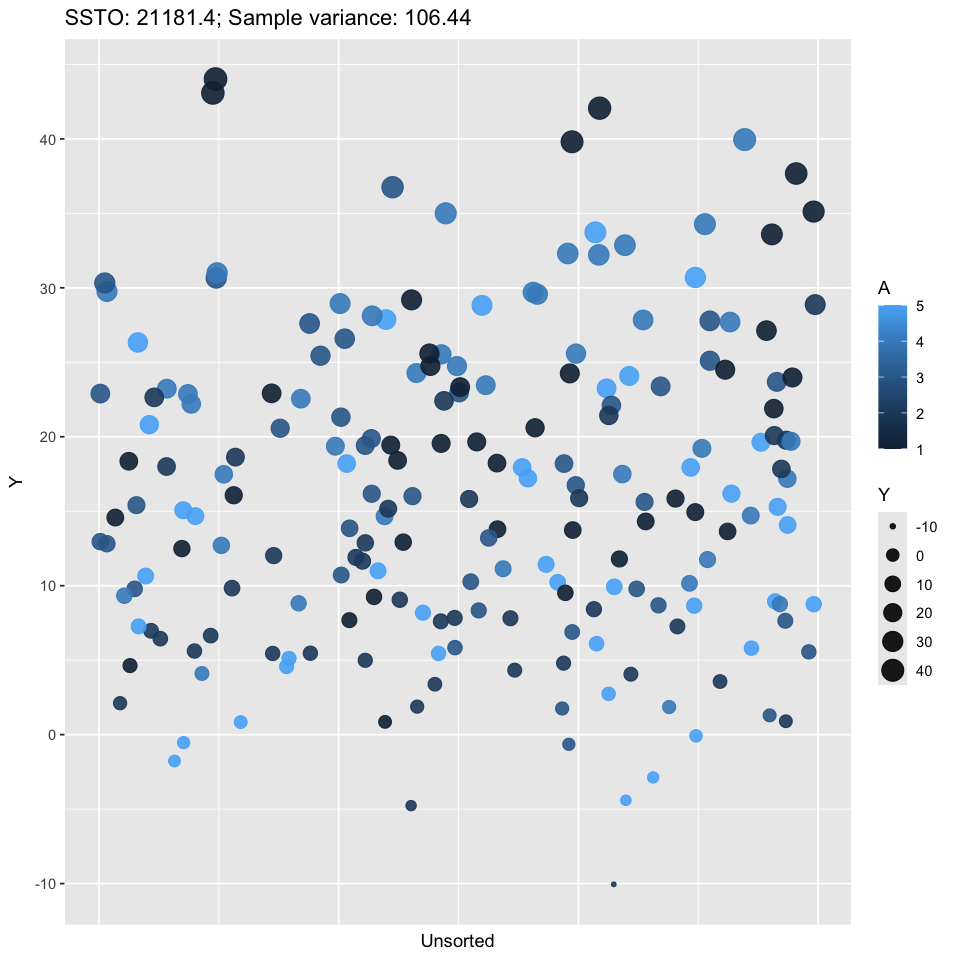

In [33]:
# Visualize the data with colors by X

options(repr.plot.width=8, repr.plot.height=8)
tmp.data<-example.ANOVA[example.ANOVA$t==1,]
ggplot(tmp.data, aes(coords.A, Y, size = Y,color=A)) +
  geom_point(alpha = 0.9) +  
  labs(title = paste('SSTO: ', round(ssto,2), '; Sample variance: ', round(var.all,2),sep='') , 
       x = 'Unsorted', y = 'Y') +
  theme(axis.text.x=element_blank(),
        axis.ticks.x=element_blank())


  

In [7]:

# Animation

options(repr.plot.width=8, repr.plot.height=8)
ggplot(example.ANOVA, aes(coords.A, Y, size = Y,color=A)) +
  geom_point(alpha = 0.9) +
  labs(x = ' ', y = 'Y') +
  theme(axis.text.x=element_blank(),
        axis.ticks.x=element_blank())+
  # gganimate specific bits:
  transition_time(t) +
  ease_aes('linear')



anim_save("../Figures/Ch4/anova-sorting-3.gif")


Rendering [==>------------------------------------------] at 29 fps ~ eta:  3s

Rendering [==>------------------------------------------] at 28 fps ~ eta:  3s

Rendering [===>-----------------------------------------] at 26 fps ~ eta:  3s

Rendering [===>-----------------------------------------] at 26 fps ~ eta:  4s

Rendering [===>-----------------------------------------] at 25 fps ~ eta:  4s

Rendering [====>----------------------------------------] at 25 fps ~ eta:  4s

Rendering [=====>---------------------------------------] at 24 fps ~ eta:  4s

Rendering [======>--------------------------------------] at 24 fps ~ eta:  4s

Rendering [=======>-------------------------------------] at 24 fps ~ eta:  3s

Rendering [========>------------------------------------] at 24 fps ~ eta:  3s

Rendering [========>------------------------------------] at 23 fps ~ eta:  3s

Rendering [=========>-----------------------------------] at 22 fps ~ eta:  3s

Rendering [==========>-----------------

In [53]:
# Calculate the residual sum of squares and variance of the error terms

anova.fit=aov(Y~as.factor(A))
anova.table=summary(anova.fit)

sse=anova.table[[1]][2,2]
mse=anova.table[[1]][2,3]
df.mse=n-2;
mse-sse/df.mse
anova.table

[1] 1.30559

              Df Sum Sq Mean Sq F value   Pr(>F)    
as.factor(A)   4   4378  1094.6    12.7 3.31e-09 ***
Residuals    195  16803    86.2                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [54]:
###### Visualize the data side by side 

options(repr.plot.width=6, repr.plot.height=6)
jpeg('../Figures/Ch4/anova-unsorted-10.jpg',width=480, height=480)

tmp.data<-example.ANOVA[example.ANOVA$t==1,]
ggplot(tmp.data, aes(coords.A, Y, size = Y,color=A)) +
  geom_point(alpha = 0.9) +  
  labs(title = paste('SSTO: ', round(ssto,2), '; Sample variance: ', round(var.all,2),sep='') , 
       x = 'Unsorted', y = 'Y') +
  theme(axis.text.x=element_blank(),
        axis.ticks.x=element_blank())
dev.off()
  
jpeg('../Figures/Ch4/anova-sorted-10.jpg',width=480, height=480)
tmp.data<-example.ANOVA[example.ANOVA$t==T,]
ggplot(tmp.data, aes(coords.A, Y, size = Y,color=A)) +
  geom_point(alpha = 0.9) +  
    labs(title = paste('SSE: ', round(sse,2), '; var. err.: ', round(mse,2),sep='') , 
         x = 'A (jittered)', y = 'Y') +
     geom_vline(xintercept = 0.5+(0:5), linetype="dotted", 
                color = "red", linewidth=1)+
      theme_bw() 
dev.off()

pdf 
  2

pdf 
  2